In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import pickle
from xgboost import XGBClassifier
from sklearn.svm import SVC
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/amazon.csv'
df = pd.read_csv(url)

In [3]:
df.head(5)

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [4]:
df.tail(5)

,reviewText,Positive
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1
19999,This game is a rip off. Here is a list of thin...,0


In [5]:
df.to_csv('Sentiment Analysis on Amazon Product Reviews.csv')

In [6]:
df.shape

(20000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [8]:
df.isnull().any()

reviewText    False
Positive      False
dtype: bool

In [9]:
df.isnull().sum()

reviewText    0
Positive      0
dtype: int64

In [10]:
import re

def contains_link(text):
    return bool(re.search(r'http[s]?://\S+|www\.\S+', str(text)))

rows_with_links = df[df['reviewText'].apply(contains_link)].index
df.drop(rows_with_links, inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.head(5)

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [12]:
df.shape

(20000, 2)

<Axes: xlabel='Positive', ylabel='count'>

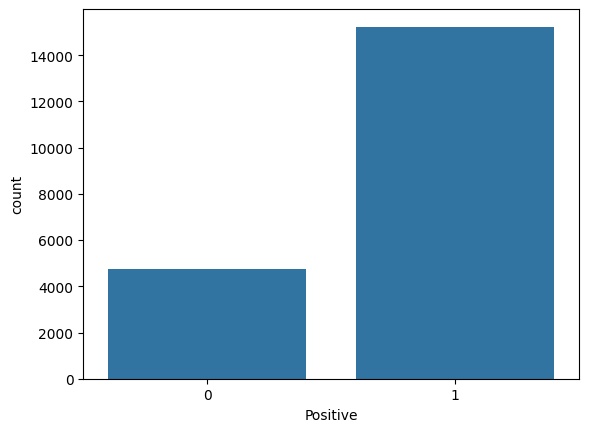

In [13]:
sns.countplot(x=df["Positive"])

In [14]:
df.columns

Index(['reviewText', 'Positive'], dtype='object')

In [15]:
def wordclode_plot(text,title):
    
    wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    
    plt.axis("off")
    plt.title("title")
    plt.show()
    

In [16]:
text_1 = "".join(df[df["Positive"] == 0]["reviewText"])

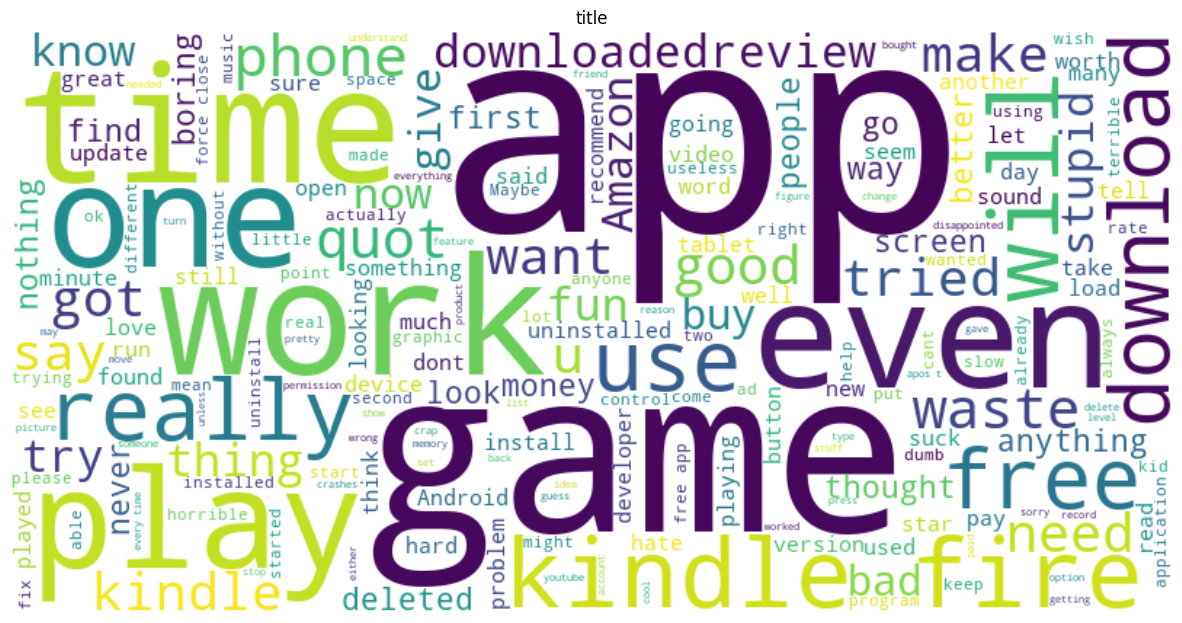

In [17]:
wordclode_plot(text_1,0)
plt.show()

In [18]:
def wordclode_plot(text,title):
    
    wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    
    plt.axis("off")
    plt.title("title")
    plt.show()

In [19]:
text_2 = "".join(df[df["Positive"] == 1]["reviewText"])

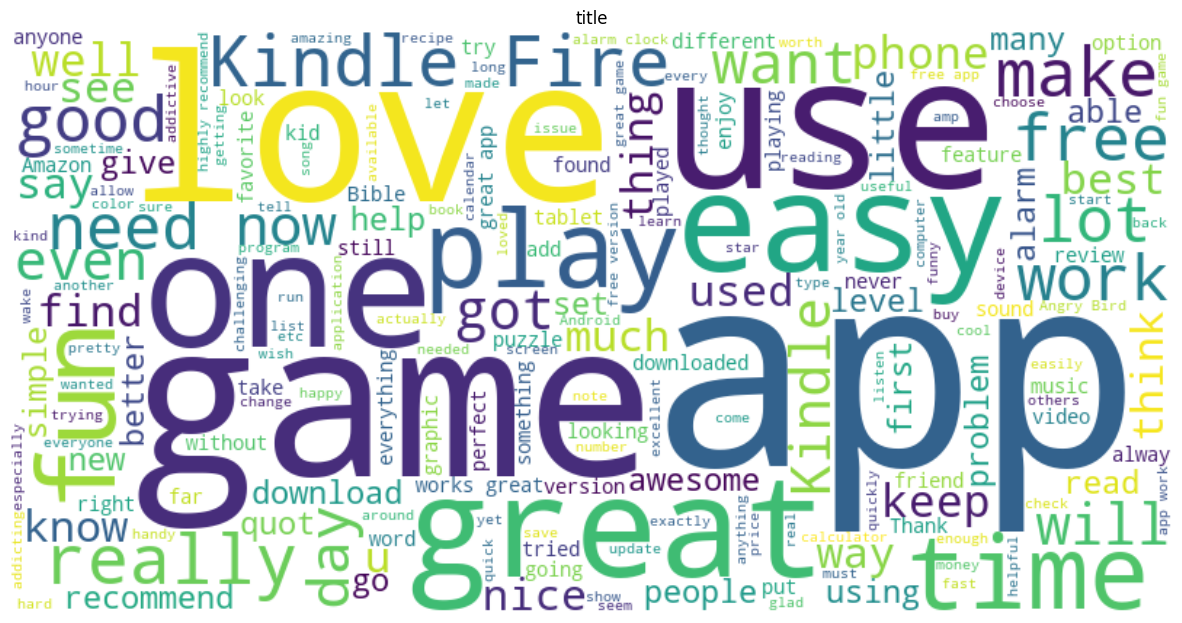

In [20]:
wordclode_plot(text_2,1)
plt.show()

In [21]:
text_column = "reviewText"
label_column = "Positive"

In [22]:
df[text_column]

0        This is a one of the best apps acording to a b...
1        This is a pretty good version of the game for ...
2        this is a really cool game. there are a bunch ...
3        This is a silly game and can be frustrating, b...
4        This is a terrific game on any pad. Hrs of fun...
                               ...                        
19995    this app is fricken stupid.it froze on the kin...
19996    Please add me!!!!! I need neighbors! Ginger101...
19997    love it!  this game. is awesome. wish it had m...
19998    I love love love this app on my side of fashio...
19999    This game is a rip off. Here is a list of thin...
Name: reviewText, Length: 20000, dtype: object

In [23]:
import nltk
nltk.download('stopwords')

import string
english_stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rupok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def preprocessing(text):
    if not isinstance(text, str):  
        return ""  

    remo_punc = [char for char in text if char not in string.punctuation]
    clean_text = "".join(remo_punc)
    words = clean_text.split()

    text = [word for word in words if word.lower() not in english_stopword]

    return " ".join(text)  

In [25]:
df[text_column] = df[text_column].apply(preprocessing)

In [26]:
df[text_column]

0        one best apps acording bunch people agree bomb...
1        pretty good version game free LOTS different l...
2        really cool game bunch levels find golden eggs...
3        silly game frustrating lots fun definitely rec...
4        terrific game pad Hrs fun grandkids love Great...
                               ...                        
19995    app fricken stupidit froze kindle wont allow p...
19996    Please add need neighbors Ginger1016 thanks bu...
19997    love game awesome wish free stuff houses didnt...
19998    love love love app side fashion story fights w...
19999    game rip list things MAKE BETTERbull First NEE...
Name: reviewText, Length: 20000, dtype: object

In [27]:
Lemmatizer= WordNetLemmatizer()

In [28]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rupok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rupok\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
def lemmatized_text(text):
    if not isinstance(text, str):
        return ""
    
    lemmatized_text = " ".join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    return lemmatized_text

In [30]:
df[text_column] = df[text_column].apply(lemmatized_text)

In [31]:
df[text_column]

0        one best apps acording bunch people agree bomb...
1        pretty good version game free LOTS different l...
2        really cool game bunch level find golden egg s...
3        silly game frustrating lot fun definitely reco...
4        terrific game pad Hrs fun grandkids love Great...
                               ...                        
19995    app fricken stupidit froze kindle wont allow p...
19996    Please add need neighbor Ginger1016 thanks bun...
19997    love game awesome wish free stuff house didnt ...
19998    love love love app side fashion story fight wo...
19999    game rip list thing MAKE BETTERbull First NEED...
Name: reviewText, Length: 20000, dtype: object

In [32]:
voctizer = TfidfVectorizer()
x = voctizer.fit_transform(df[text_column])
y = df[label_column] 

In [33]:
x.shape

(20000, 22629)

In [34]:
y.value_counts()

Positive
1    15233
0     4767
Name: count, dtype: int64

In [35]:
sm = SMOTE(random_state=42)

In [36]:
re_x,re_y = sm.fit_resample(x,y)

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(re_x,re_y,train_size=0.70,random_state=30)

In [38]:
x_test,x_val,y_test,y_val = train_test_split(xtest,ytest,test_size=0.50,random_state=3)

In [39]:
model_ran = RandomForestClassifier(random_state = 50)
model_svm = SVC(max_iter=1000)
model_log = LogisticRegression()
model_mult_nb = MultinomialNB()
model_bern_nb =BernoulliNB()
model_xgb = XGBClassifier()

In [40]:
model_ran.fit(xtrain,ytrain)

RandomForestClassifier(random_state=50)

In [41]:
y_ran_train = model_ran.predict(xtrain)
y_ran_test = model_ran.predict(x_test)

In [42]:

ran_train_acc = accuracy_score(ytrain,y_ran_train)
ran_train_rep = classification_report(ytrain,y_ran_train)
ran_train_con = confusion_matrix(ytrain,y_ran_train)
print("Model Evluction With Train Data Random Forest")
print(ran_train_acc)
print(ran_train_rep)
print(ran_train_con)

ran_test_acc = accuracy_score(y_test,y_ran_test)
ran_test_rep = classification_report(y_test,y_ran_test)
ran_test_con = confusion_matrix(y_test,y_ran_test)
print("Model Evluction With Test Data Random Forest")
print(ran_test_acc)
print(ran_test_rep)
print(ran_test_con)


Model Evluction With Train Data Random Forest
0.9999531088811779
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10651
           1       1.00      1.00      1.00     10675

    accuracy                           1.00     21326
   macro avg       1.00      1.00      1.00     21326
weighted avg       1.00      1.00      1.00     21326

[[10651     0]
 [    1 10674]]
Model Evluction With Test Data Random Forest
0.924945295404814
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2306
           1       0.93      0.92      0.92      2264

    accuracy                           0.92      4570
   macro avg       0.92      0.92      0.92      4570
weighted avg       0.92      0.92      0.92      4570

[[2141  165]
 [ 178 2086]]


In [43]:
model_svm.fit(xtrain,ytrain)

SVC(max_iter=1000)

In [44]:
y_svm_train = model_svm.predict(xtrain)
y_svm_test = model_svm.predict(x_test)

In [45]:

svm_train_acc = accuracy_score(ytrain,y_svm_train)
svm_train_rep = classification_report(ytrain,y_svm_train)
svm_train_con = confusion_matrix(ytrain,y_svm_train)
print("Model Evluction With Train Data SVM")
print(svm_train_acc)
print(svm_train_rep)
print(svm_train_con)

svm_test_acc = accuracy_score(y_test,y_svm_test)
svm_test_rep = classification_report(y_test,y_svm_test)
svm_test_con = confusion_matrix(y_test,y_svm_test)
print("Model Evluction With Test Data SVM")
print(svm_test_acc)
print(svm_test_rep)
print(svm_test_con)

Model Evluction With Train Data SVM
0.965488136546938
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10651
           1       0.98      0.95      0.96     10675

    accuracy                           0.97     21326
   macro avg       0.97      0.97      0.97     21326
weighted avg       0.97      0.97      0.97     21326

[[10448   203]
 [  533 10142]]
Model Evluction With Test Data SVM
0.9076586433260394
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2306
           1       0.92      0.89      0.91      2264

    accuracy                           0.91      4570
   macro avg       0.91      0.91      0.91      4570
weighted avg       0.91      0.91      0.91      4570

[[2126  180]
 [ 242 2022]]


In [46]:
model_log.fit(xtrain,ytrain)

LogisticRegression()

In [47]:
y_logis_train = model_log.predict(xtrain)
y_logis_test = model_log.predict(x_test)

In [48]:
logis_train_acc = accuracy_score(ytrain,y_logis_train)
logis_train_rep = classification_report(ytrain,y_logis_train)
logis_train_con = confusion_matrix(ytrain,y_logis_train)
print("Model Evluction With Train Data Logistic Regression")
print(logis_train_acc)
print(logis_train_rep)
print(logis_train_con)

logis_test_acc = accuracy_score(y_test,y_logis_test)
logis_test_rep = classification_report(y_test,y_logis_test)
logis_test_con = confusion_matrix(y_test,y_logis_test)
print("Model Evluction With Test Data Logistic Regression")
print(logis_test_acc)
print(logis_test_rep)
print(logis_test_con)

Model Evluction With Train Data Logistic Regression
0.9359936228078402
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10651
           1       0.95      0.92      0.93     10675

    accuracy                           0.94     21326
   macro avg       0.94      0.94      0.94     21326
weighted avg       0.94      0.94      0.94     21326

[[10158   493]
 [  872  9803]]
Model Evluction With Test Data Logistic Regression
0.9133479212253829
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2306
           1       0.93      0.89      0.91      2264

    accuracy                           0.91      4570
   macro avg       0.91      0.91      0.91      4570
weighted avg       0.91      0.91      0.91      4570

[[2160  146]
 [ 250 2014]]


In [49]:
model_mult_nb.fit(xtrain,ytrain)

MultinomialNB()

In [50]:
y_mult_train = model_mult_nb.predict(xtrain)
y_mult_test = model_mult_nb.predict(x_test)

In [51]:
mult_train_acc = accuracy_score(ytrain,y_mult_train)
mult_train_rep = classification_report(ytrain,y_mult_train)
mult_train_con = confusion_matrix(ytrain,y_mult_train)
print("Model Evluction With Train Data MultinomialNB")
print(mult_train_acc)
print(mult_train_rep)
print(mult_train_con)

mult_test_acc = accuracy_score(y_test,y_mult_test)
mult_test_rep = classification_report(y_test,y_mult_test)
mult_test_con = confusion_matrix(y_test,y_mult_test)
print("Model Evluction With Test Data MultinomialNB")
print(mult_test_acc)
print(mult_test_rep)
print(mult_test_con)

Model Evluction With Train Data MultinomialNB
0.9306480352621214
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10651
           1       0.92      0.94      0.93     10675

    accuracy                           0.93     21326
   macro avg       0.93      0.93      0.93     21326
weighted avg       0.93      0.93      0.93     21326

[[ 9816   835]
 [  644 10031]]
Model Evluction With Test Data MultinomialNB
0.9006564551422319
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2306
           1       0.90      0.90      0.90      2264

    accuracy                           0.90      4570
   macro avg       0.90      0.90      0.90      4570
weighted avg       0.90      0.90      0.90      4570

[[2073  233]
 [ 221 2043]]


In [52]:
model_bern_nb.fit(xtrain,ytrain)

BernoulliNB()

In [53]:
y_bern_train = model_bern_nb.predict(xtrain)
y_bern_test = model_bern_nb.predict(x_test)

In [54]:
bern_train_acc = accuracy_score(ytrain,y_bern_train)
bern_train_rep = classification_report(ytrain,y_bern_train)
bern_train_con = confusion_matrix(ytrain,y_bern_train)
print("Model Evluction With Train Data BernoulliNB")
print(bern_train_acc)
print(bern_train_rep)
print(bern_train_con)

bern_test_acc = accuracy_score(y_test,y_bern_test)
bern_test_rep = classification_report(y_test,y_bern_test)
bern_test_con = confusion_matrix(y_test,y_bern_test)
print("Model Evluction With Test Data BernoulliNB")
print(bern_test_acc)
print(bern_test_rep)
print(bern_test_con)

Model Evluction With Train Data BernoulliNB
0.9355716027384413
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     10651
           1       0.94      0.93      0.94     10675

    accuracy                           0.94     21326
   macro avg       0.94      0.94      0.94     21326
weighted avg       0.94      0.94      0.94     21326

[[9999  652]
 [ 722 9953]]
Model Evluction With Test Data BernoulliNB
0.912253829321663
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2306
           1       0.92      0.90      0.91      2264

    accuracy                           0.91      4570
   macro avg       0.91      0.91      0.91      4570
weighted avg       0.91      0.91      0.91      4570

[[2133  173]
 [ 228 2036]]


In [55]:
model_xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [56]:
y_xgb_train = model_xgb.predict(xtrain)
y_xgb_test = model_xgb.predict(x_test)

In [57]:
xgb_train_acc = accuracy_score(ytrain,y_xgb_train)
xgb_train_rep = classification_report(ytrain,y_xgb_train)
xgb_train_con = confusion_matrix(ytrain,y_xgb_train)
print("Model Evluction With Train Data XGBoost")
print(xgb_train_acc)
print(xgb_train_rep)
print(xgb_train_con)

xgb_test_acc = accuracy_score(y_test,y_xgb_test)
xgb_test_rep = classification_report(y_test,y_xgb_test)
xgb_test_con = confusion_matrix(y_test,y_xgb_test)
print("Model Evluction With Test Data XGBoost")
print(xgb_test_acc)
print(xgb_test_rep)
print(xgb_test_con)

Model Evluction With Train Data XGBoost
0.9445278064334615
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10651
           1       0.94      0.95      0.94     10675

    accuracy                           0.94     21326
   macro avg       0.94      0.94      0.94     21326
weighted avg       0.94      0.94      0.94     21326

[[10047   604]
 [  579 10096]]
Model Evluction With Test Data XGBoost
0.899343544857768
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2306
           1       0.89      0.91      0.90      2264

    accuracy                           0.90      4570
   macro avg       0.90      0.90      0.90      4570
weighted avg       0.90      0.90      0.90      4570

[[2058  248]
 [ 212 2052]]


In [58]:
param_grid_ran = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [59]:
grid_search = GridSearchCV(estimator=model_ran,
                           param_grid=param_grid_ran,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=50), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [60]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred_ran = best_model.predict(x_val)
print(classification_report(y_val, y_pred_ran))
print(confusion_matrix(y_val, y_pred_ran))


Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.9418081957779524
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2276
           1       0.95      0.94      0.95      2294

    accuracy                           0.95      4570
   macro avg       0.95      0.95      0.95      4570
weighted avg       0.95      0.95      0.95      4570

[[2172  104]
 [ 131 2163]]


In [61]:
joblib.dump(grid_search,'random_forest_model_sentiment_analysis.pkl')

['random_forest_model_sentiment_analysis.pkl']

In [62]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [64]:
grid_svm = GridSearchCV(model_svm, param_grid_svm, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_svm.fit(xtrain, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [65]:
print("Best Parameters:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

best_model = grid_svm.best_estimator_

y_pred_svm = best_model.predict(x_val)
print(classification_report(y_val, y_pred_svm))
print(confusion_matrix(y_val, y_pred_svm))

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.9172840129072044
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2276
           1       0.92      0.89      0.91      2294

    accuracy                           0.91      4570
   macro avg       0.91      0.91      0.91      4570
weighted avg       0.91      0.91      0.91      4570

[[2109  167]
 [ 246 2048]]


In [66]:
joblib.dump(grid_search,'svm_model_sentiment_analysis.pkl')

['svm_model_sentiment_analysis.pkl']

In [71]:
param_grid_logis = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

In [72]:
grid_search_logis = GridSearchCV(model_log, param_grid_logis, cv=5, scoring='accuracy')
grid_search_logis.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [73]:
print("Best Parameters:", grid_search_logis.best_params_)
print("Best CV Accuracy:", grid_search_logis.best_score_)

best_model = grid_search_logis.best_estimator_

y_pred_log = best_model.predict(x_val)
print(classification_report(y_val, y_pred_log))
print(confusion_matrix(y_val, y_pred_log))

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Accuracy: 0.9201912776890147
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2276
           1       0.95      0.89      0.92      2294

    accuracy                           0.92      4570
   macro avg       0.92      0.92      0.92      4570
weighted avg       0.92      0.92      0.92      4570

[[2172  104]
 [ 250 2044]]


In [74]:
joblib.dump(grid_search_logis,'logisticregression_model_sentiment_analysis.pkl')

['logisticregression_model_sentiment_analysis.pkl']

In [75]:
param_grid_mult = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

In [76]:
grid_search_mult = GridSearchCV(model_mult_nb, param_grid_mult, cv=5, scoring='accuracy')
grid_search_mult.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [78]:
print("Best Parameters:", grid_search_mult.best_params_)
print("Best CV Accuracy:", grid_search_mult.best_score_)

best_model = grid_search_mult.best_estimator_

y_pred_mult = best_model.predict(x_val)
print(classification_report(y_val, y_pred_mult))
print(confusion_matrix(y_val, y_pred_mult))

Best Parameters: {'alpha': 0.1, 'fit_prior': False}
Best CV Accuracy: 0.9002625300296957
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2276
           1       0.93      0.87      0.90      2294

    accuracy                           0.90      4570
   macro avg       0.90      0.90      0.90      4570
weighted avg       0.90      0.90      0.90      4570

[[2129  147]
 [ 297 1997]]


In [79]:
joblib.dump(grid_search_mult,'MultinomialNB_model_sentiment_analysis.pkl')

['MultinomialNB_model_sentiment_analysis.pkl']

In [80]:
param_grid_bern = {
    'alpha': [0.1, 0.5, 1.0, 2.0],         
    'fit_prior': [True, False],           
    'binarize': [0.0, 0.5, 1.0]            
}

In [82]:
grid_bern = GridSearchCV(model_bern_nb, param_grid_bern, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_bern.fit(xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0],
                         'binarize': [0.0, 0.5, 1.0],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=2)

In [83]:
print("Best Parameters:", grid_bern.best_params_)
print("Best CV Accuracy:", grid_bern.best_score_)

best_model = grid_bern.best_estimator_

y_pred_bern = best_model.predict(x_val)
print(classification_report(y_val, y_pred_bern))
print(confusion_matrix(y_val, y_pred_bern))

Best Parameters: {'alpha': 0.1, 'binarize': 0.0, 'fit_prior': True}
Best CV Accuracy: 0.9138609875847029
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2276
           1       0.92      0.90      0.91      2294

    accuracy                           0.91      4570
   macro avg       0.91      0.91      0.91      4570
weighted avg       0.91      0.91      0.91      4570

[[2108  168]
 [ 234 2060]]


In [84]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [86]:
grid_xgb = GridSearchCV(estimator=model_xgb,
                        param_grid=param_grid_xgb,
                        scoring='accuracy',
                        cv=5,
                        verbose=2,
                        n_jobs=-1)

grid_xgb.fit(xtrain, ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [87]:
print("Best Parameters:", grid_xgb.best_params_)
print("Best CV Accuracy:", grid_xgb.best_score_)

best_model = grid_xgb.best_estimator_

y_pred_xgb = best_model.predict(x_val)
print(classification_report(y_val, y_pred_xgb))
print(confusion_matrix(y_val, y_pred_xgb))

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best CV Accuracy: 0.9057959415185586
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2276
           1       0.92      0.91      0.91      2294

    accuracy                           0.91      4570
   macro avg       0.91      0.91      0.91      4570
weighted avg       0.91      0.91      0.91      4570

[[2084  192]
 [ 213 2081]]


In [88]:
joblib.dump(grid_bern,'BernoulliNB_model_sentiment_analysis.pkl')

['BernoulliNB_model_sentiment_analysis.pkl']

In [89]:
joblib.dump(grid_xgb,'XGboost_model_sentiment_analysis.pkl')

['XGboost_model_sentiment_analysis.pkl']

In [90]:
results = []

results.append({
    "Model": "SVC",
    "Validation Accuracy":grid_svm.best_score_ ,
    "Test Accuracy": svm_test_acc,
    "Train Accuracy":svm_train_acc
})

results.append({
    "Model": "XGBoost",
    "Validation Accuracy": grid_xgb.best_score_,
    "Test Accuracy": xgb_test_acc,
    "Train Accuracy": xgb_train_acc
    
})

results.append({
    "Model": "BernoulliNB",
    "Validation Accuracy":  grid_bern.best_score_,
    "Test Accuracy": bern_test_acc,
    "Train Accuracy":bern_train_acc
    
})

results.append({
    "Model": "Random Forest",
    "Validation Accuracy":grid_search.best_score_ ,
    "Test Accuracy": ran_test_acc,
    "Train Accuracy": svm_train_acc
})

results.append({
    "Model": "Logistic Regression",
    "Validation Accuracy":grid_search_logis.best_score_ ,
    "Test Accuracy": logis_test_acc,
    "Train Accuracy": logis_train_acc
})

results.append({
    "Model": "MultinomialNB",
    "Validation Accuracy":grid_search_mult.best_score_ ,
    "Test Accuracy": mult_test_acc,
    "Train Accuracy": mult_train_acc
})

In [91]:
df_results = pd.DataFrame(results)
print(df_results)

                 Model  Validation Accuracy  Test Accuracy  Train Accuracy
0                  SVC             0.917284       0.907659        0.965488
1              XGBoost             0.905796       0.899344        0.944528
2          BernoulliNB             0.913861       0.912254        0.935572
3        Random Forest             0.941808       0.924945        0.965488
4  Logistic Regression             0.920191       0.913348        0.935994
5        MultinomialNB             0.900263       0.900656        0.930648


In [98]:
df_plot = df_results.melt(id_vars='Model',
                          value_vars=['Train Accuracy', 'Validation Accuracy', 'Test Accuracy'],
                          var_name='Accuracy Type',
                          value_name='Score')

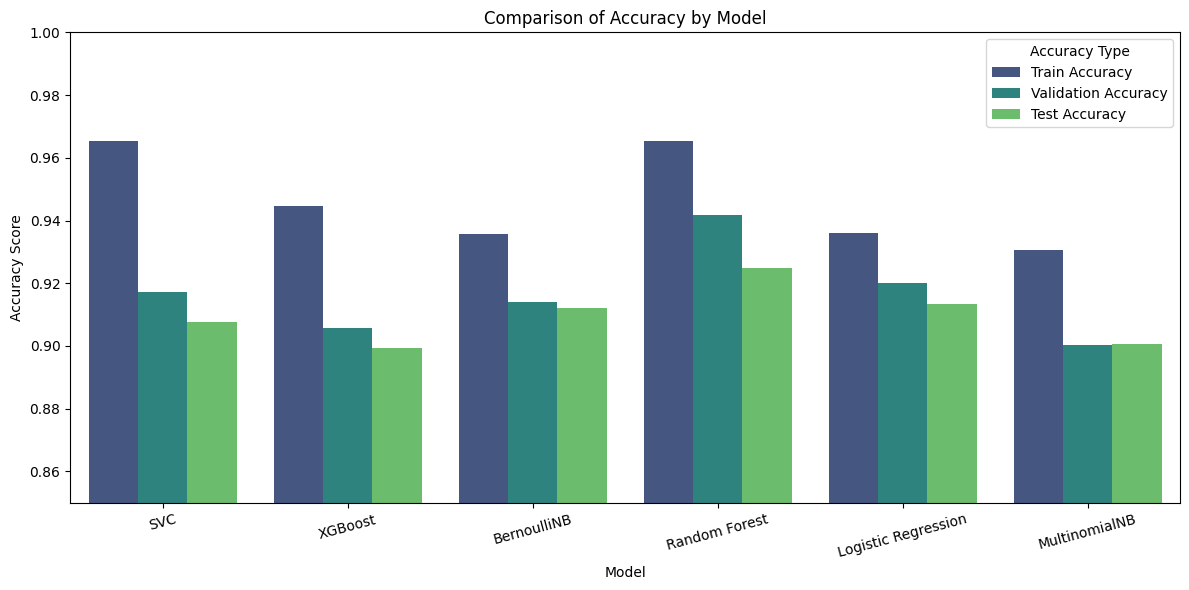

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Accuracy Type', data=df_plot, palette='viridis')

plt.title('Comparison of Accuracy by Model')
plt.ylabel('Accuracy Score')
plt.ylim(0.85, 1.0)  
plt.legend(title='Accuracy Type')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()